In [1]:
import pandas as pd  
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

warnings.filterwarnings("ignore")

os.chdir(r"C:\Users\ezkiska\Videos\Imarticus\Python\4th Week 28th and 29th Dec\29th Dec Practical  DT, RF & XG")

bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [2]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#  y (response) : Traget variable
# convert the response to numeric values and store as a new column
bank['outcome'] = bank.y.map({'no':0, 'yes':1})
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [4]:
bank = bank.drop(['y'], axis = 1)

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
outcome           0
dtype: int64

We observe no nulls present in this case hence Null value treatement won't be required here

In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [8]:
bank.describe(include = ['O']) #includes object data type also

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


Text(0.5, 0, 'Subscribed for Term deposit')

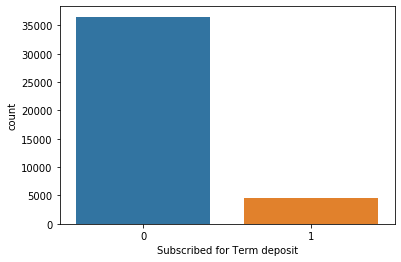

In [9]:
# Visualizing Target Variable
sns.countplot(x=bank['outcome'])
plt.xlabel('Subscribed for Term deposit')

In [10]:
np.round(len(bank['outcome'][bank['outcome'] == 0])/bank.shape[0],2)

0.89

In [11]:
#checeking all data types in dataframe
bank.dtypes  

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
outcome             int64
dtype: object

In [12]:
catCols = bank.dtypes[bank.dtypes == 'object'].index.tolist()

In [13]:
catCols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [14]:
data_num = bank.select_dtypes(include = ['float64', 'int64'])

In [15]:
#checking contents of Numerical Columns
data_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [16]:
data_cat = bank.select_dtypes(include = ['object'])

In [17]:
#checking contents of categorical Columns
data_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


### Feature Engineering on Categorical Variables

#### Education

In [18]:
data_cat['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [19]:
data_cat['outcome'] = bank['outcome']

In [20]:
data_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,outcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0


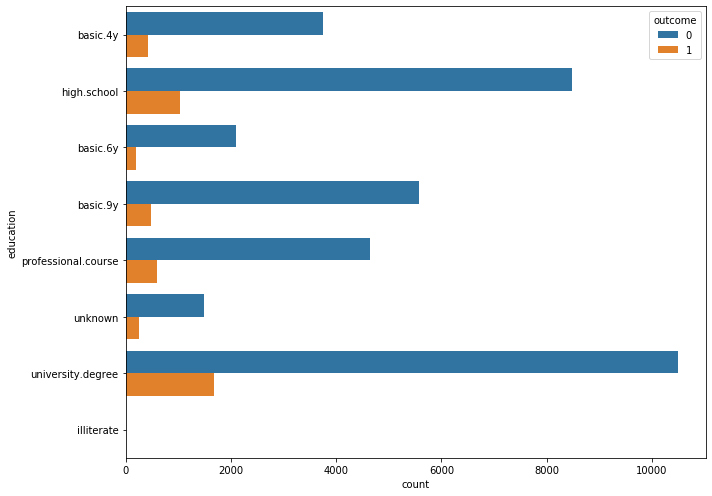

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(y='education',hue='outcome',data=data_cat)
plt.tight_layout()

In [22]:
data_cat['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

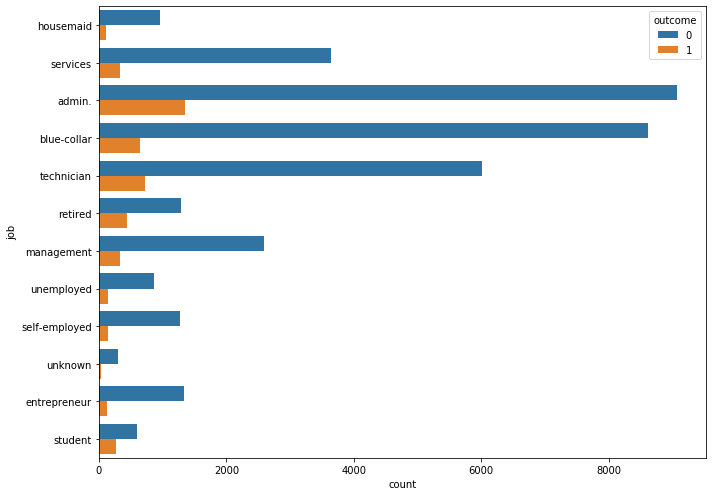

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(y='job',hue='outcome',data=bank)
plt.tight_layout()

In [24]:
data_cat['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

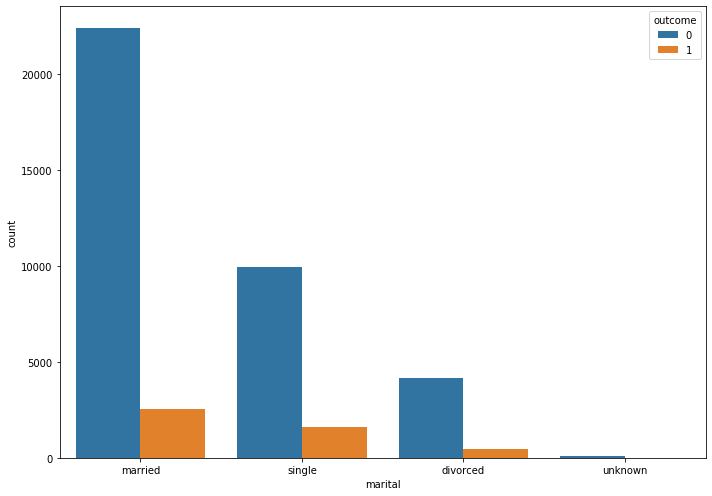

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(x='marital',hue='outcome',data=data_cat)
plt.tight_layout()

In [26]:
data_cat['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [27]:
data_cat['outcome'][data_cat['default']=='yes'] # checks who all 3 yes candidates are from outcome column

21580    0
21581    0
24866    0
Name: outcome, dtype: int64

In [28]:
tab = pd.crosstab(data_cat['default'],  data_cat['outcome'],margins = False)
prop = []
for i in range(tab.shape[0]):
    value = tab.iloc[i,1]/tab.iloc[i,0]
    prop.append(value)
tab['prop'] = prop #

In [29]:
def createProportions(df,colName, dependentColName):
    
    tab = pd.crosstab(df[colName],  df[dependentColName],margins = False)
    prop = []
    for i in range(tab.shape[0]):
        value = tab.iloc[i,1]/tab.iloc[i,0]
        prop.append(value)
    tab['prop'] = prop

    return tab


In [30]:
def categoryRename(df, colName, oldName, newName):
    
    df[colName][df[colName]==oldName]=newName
    #x = df[colName].value_counts()
    return df

In [31]:
# club yes with unknown based on 1 proportion
data_cat = categoryRename(data_cat,'default', 'yes', 'unknown') #using previous function

In [32]:
data_cat['default'].value_counts()

no         32588
unknown     8600
Name: default, dtype: int64

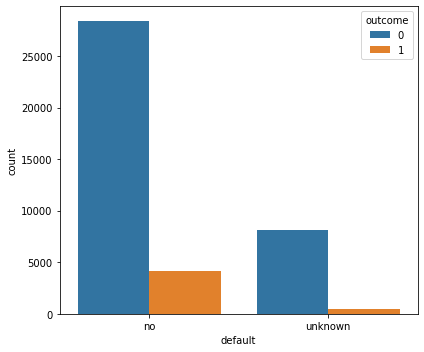

In [33]:
plt.figure(figsize=(6,5))
sns.countplot(x='default',hue='outcome',data=data_cat)
plt.tight_layout()

In [34]:
data_cat['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

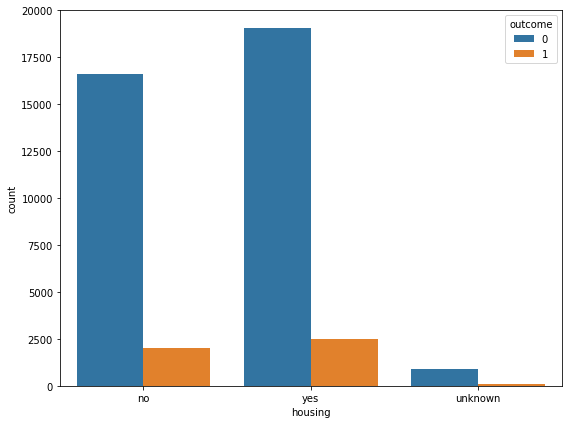

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='housing',hue='outcome',data=data_cat)
plt.tight_layout()

In [36]:
data_cat['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

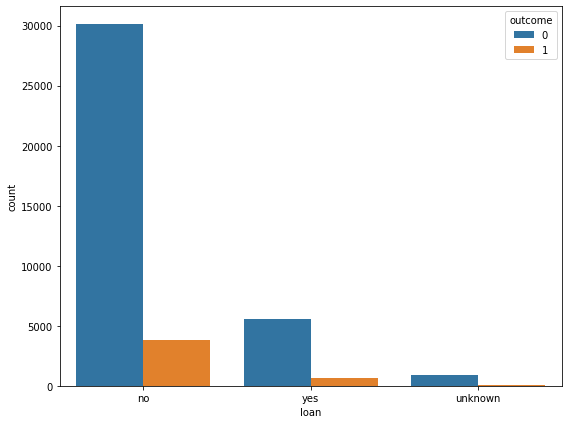

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x='loan',hue='outcome',data=bank)
plt.tight_layout()

In [38]:
data_cat['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

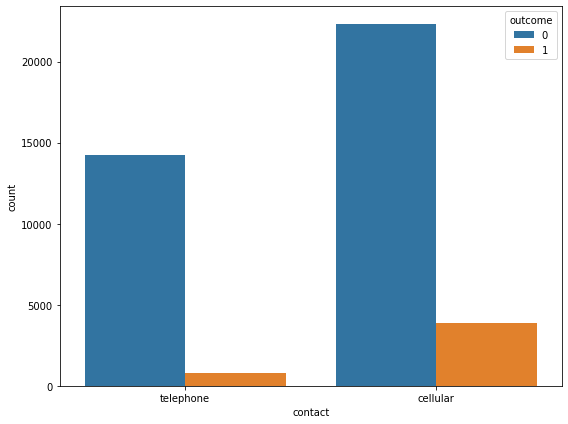

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='contact',hue='outcome',data=bank)
plt.tight_layout()

In [40]:
data_cat['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

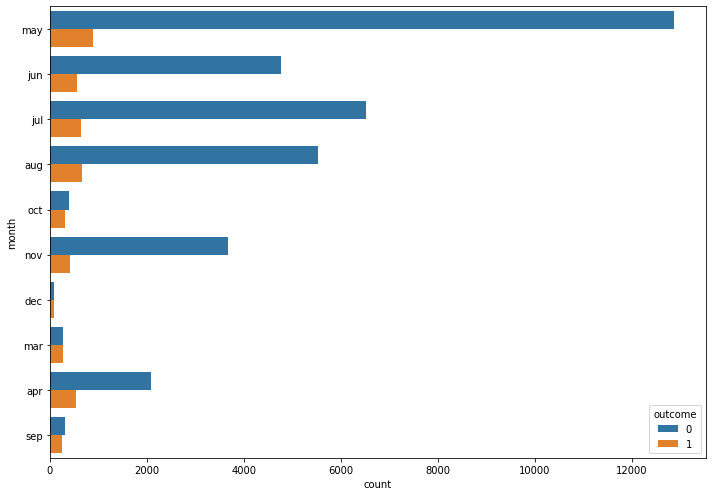

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(y='month',hue='outcome',data=bank)
plt.tight_layout()

In [42]:
data_cat['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

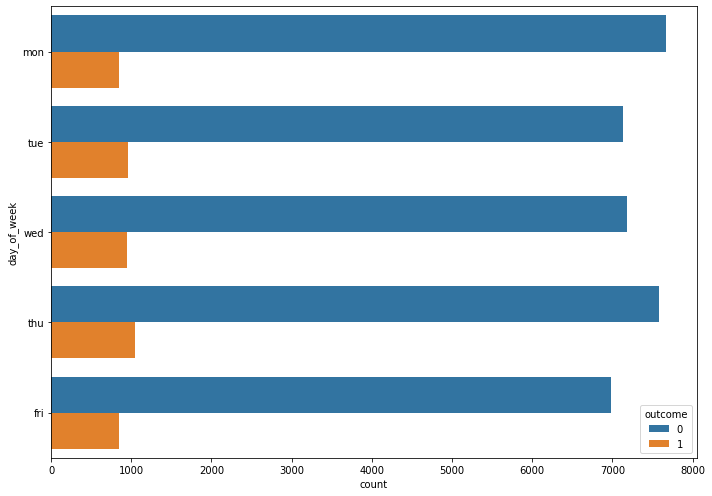

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(y='day_of_week',hue='outcome',data=bank)
plt.tight_layout()

In [44]:
tab1 = createProportions(data_cat,'day_of_week', 'outcome')
tab1

outcome,0,1,prop
day_of_week,,,
fri,6981,846,0.121186
mon,7667,847,0.110473
thu,7578,1045,0.137899
tue,7137,953,0.133529
wed,7185,949,0.132081


In [45]:
data_cat['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

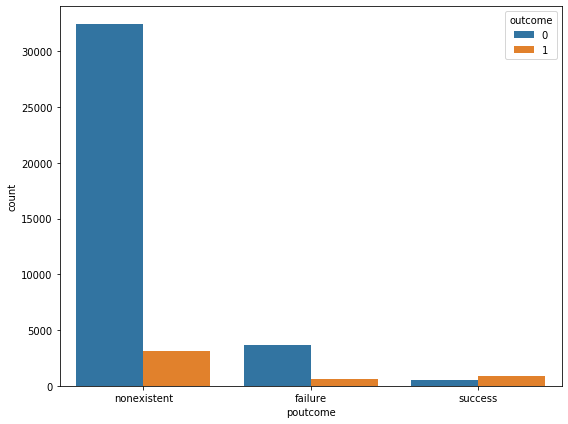

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x='poutcome',hue='outcome',data=bank)
plt.tight_layout()
plt.show()
plt.close()

In [47]:
tab2 = createProportions(data_cat,'poutcome', 'outcome')
tab2

outcome,0,1,prop
poutcome,,,
failure,3647,605,0.165890
nonexistent,32422,3141,0.096879
success,479,894,1.866388


### Checking Numerical columns

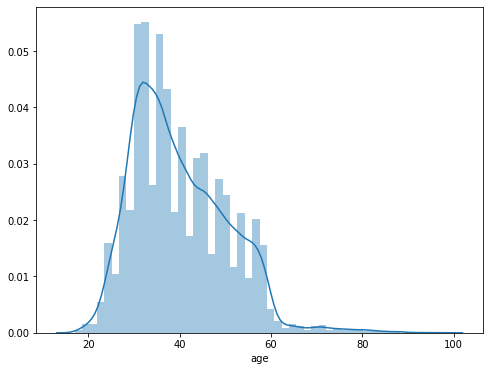

In [48]:
plt.figure(figsize = (8,6))
sns.distplot(data_num['age'])
plt.show()

In [49]:
data_num['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [50]:
tab3 = createProportions(data_num,'pdays', 'outcome')
tab3 # 999 has maximum occurances so ideally we will frop this column

outcome,0,1,prop
pdays,,,
0,5,10,2.000000
1,18,8,0.444444
2,24,37,1.541667
3,141,298,2.113475
4,55,63,1.145455
5,17,29,1.705882
6,123,289,2.349593
7,20,40,2.000000
8,6,12,2.000000


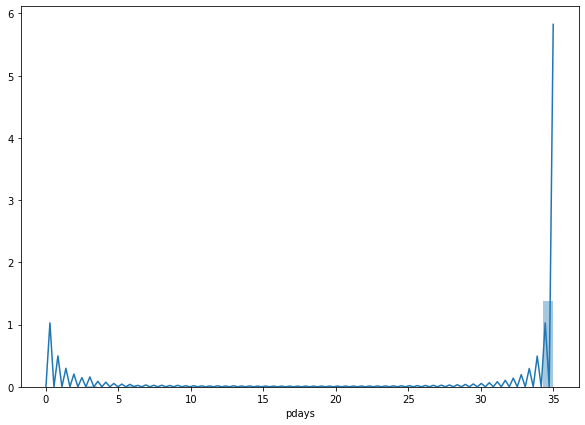

In [51]:
data_num.pdays[data_num.pdays==999]=35 ## 
plt.figure(figsize = (10,7))
sns.distplot(data_num['pdays'])
plt.show()

In [52]:
data_num['pdays_band'] = pd.cut(data_num['pdays'], 5)

In [53]:
data_num['pdays_band'].value_counts()

(28.0, 35.0]     39673
(-0.035, 7.0]     1177
(7.0, 14.0]        276
(14.0, 21.0]        56
(21.0, 28.0]         6
Name: pdays_band, dtype: int64

In [54]:
data_num[['pdays_band', 'outcome']].groupby(['pdays_band'], 
        as_index=False).mean().sort_values(by='pdays_band', ascending=True)

,pdays_band,outcome
0,"(-0.035, 7.0]",0.657604
1,"(7.0, 14.0]",0.568841
2,"(14.0, 21.0]",0.553571
3,"(21.0, 28.0]",0.833333
4,"(28.0, 35.0]",0.092582


In [55]:
data_num.loc[ data_num['pdays'] <= 7.0, 'pdays'] = 0
data_num.loc[(data_num['pdays'] > 7.0) & (data_num['pdays'] <= 14.0), 'pdays'] = 1
data_num.loc[ data_num['pdays'] > 14, 'pdays'] = 2

In [56]:
data_num.pdays.value_counts()

2    39735
0     1177
1      276
Name: pdays, dtype: int64

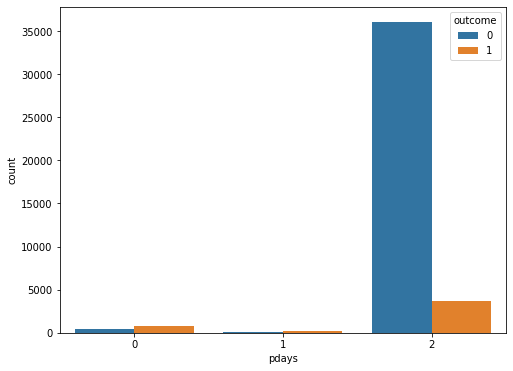

In [57]:
plt.figure(figsize=(8,6))
sns.countplot(x='pdays',hue='outcome',data=data_num)
plt.show()

In [58]:
def clubLabelEncoder(df, feature, k):
    
    #df[feature + '_band'] = pd.cut(df[feature], k)
    #data = df[[feature + '_band', target]].groupby([feature + '_band'], as_index = False).mean().sort_values(by = feature + '_band', ascending = True)
    #x = data[feature + '_band'].tolist()
    df[feature +'_band'] = pd.qcut(df[feature], k)
    x = df[feature + '_band'].value_counts().index.tolist()
    
    intervals = []
    for i in range(len(x)):
        leftInt = x[i].left
        rtInt = x[i].right
        intervals.append(leftInt)
        intervals.append(rtInt)
    
    intervals_ = sorted(list(set(intervals)))
    
    for i in range(len(intervals_)-1):
        
        df.loc[(df[feature] > intervals_[i]) & (df[feature] <= intervals_[i+1]), feature] = i
        
    df = df.iloc[:,:-1]
        
    return df[feature].value_counts()

In [59]:
# emp.var.rate
data_num['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [60]:
data_num.loc[ data_num['emp.var.rate'] <= 0, 'emp.var.rate'] = 0
data_num.loc[ data_num['emp.var.rate'] > 0, 'emp.var.rate'] = 1
data_num['emp.var.rate'].value_counts()

1.0    23997
0.0    17191
Name: emp.var.rate, dtype: int64

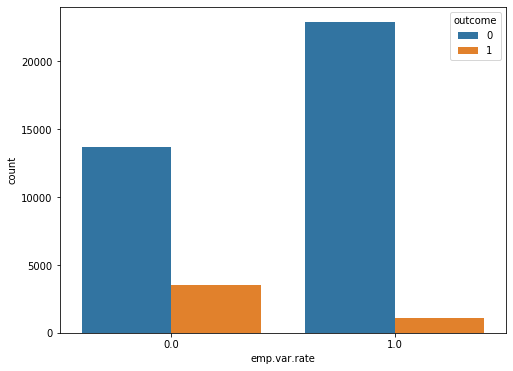

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(x='emp.var.rate',hue='outcome',data=data_num)
plt.show()

In [62]:
#cons.price.idx
data_num['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [63]:
data_num['cons.price.idx_band'] = pd.cut(data_num['cons.price.idx'], 4)

In [64]:
data_num['cons.price.idx_band'].value_counts()

(92.842, 93.484]    18304
(93.484, 94.126]    15363
(94.126, 94.767]     5320
(92.198, 92.842]     2201
Name: cons.price.idx_band, dtype: int64

In [65]:
data_num.loc[ data_num['cons.price.idx'] <= 92.842, 'cons.price.idx'] = 0
data_num.loc[(data_num['cons.price.idx'] > 92.842) & (data_num['cons.price.idx'] <= 93.484), 'cons.price.idx'] = 1
data_num.loc[(data_num['cons.price.idx'] > 93.484) & (data_num['cons.price.idx'] <= 94.126), 'cons.price.idx'] = 2
data_num.loc[data_num['cons.price.idx'] > 94.126, 'cons.price.idx'] = 3

In [66]:
data_num['cons.price.idx'].value_counts()

1.0    18304
2.0    15363
3.0     5320
0.0     2201
Name: cons.price.idx, dtype: int64

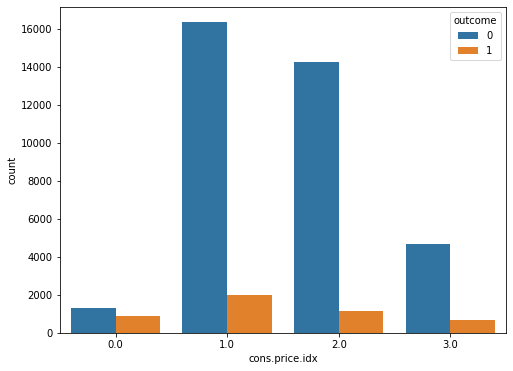

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(x='cons.price.idx',hue='outcome',data=data_num)
plt.show()

In [68]:
#cons.conf.idx
data_num['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [69]:
data_num['cons.conf.idx_band'] = pd.cut(data_num['cons.conf.idx'], 4)
data_num['cons.conf.idx_band'].value_counts()

(-44.825, -38.85]     16209
(-38.85, -32.875]     14262
(-50.824, -44.825]     8876
(-32.875, -26.9]       1841
Name: cons.conf.idx_band, dtype: int64

In [70]:
data_num.loc[ data_num['cons.conf.idx'] >= -32.875, 'cons.conf.idx'] = 0
data_num.loc[(data_num['cons.conf.idx'] < -32.875) & (data_num['cons.conf.idx'] >= -38.85), 'cons.conf.idx'] = 1
data_num.loc[(data_num['cons.conf.idx'] < -38.85) & (data_num['cons.conf.idx'] >= -44.825), 'cons.conf.idx'] = 2
data_num.loc[data_num['cons.conf.idx'] < -44.825, 'cons.conf.idx'] = 3

In [71]:
data_num['cons.conf.idx'].value_counts()

2.0    16209
1.0    14262
3.0     8876
0.0     1841
Name: cons.conf.idx, dtype: int64

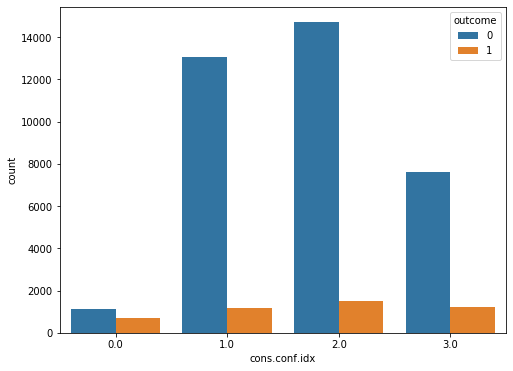

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(x='cons.conf.idx',hue='outcome',data=data_num)
plt.show()

In [73]:
# nr.employed
data_num['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [74]:
data_num['nr.employed_band'] = pd.cut(data_num['nr.employed'], 4)
data_num['nr.employed_band'].value_counts()

(5161.975, 5228.1]      27690
(5095.85, 5161.975]      8534
(4963.336, 5029.725]     3301
(5029.725, 5095.85]      1663
Name: nr.employed_band, dtype: int64

In [75]:
data_num.loc[ data_num['nr.employed'] <= 5029.735, 'nr.employed'] = 0
data_num.loc[(data_num['nr.employed'] > 5029.735) & (data_num['nr.employed'] <= 5095.85), 'nr.employed'] = 1
data_num.loc[(data_num['nr.employed'] > 5095.85) & (data_num['nr.employed'] <= 5161.975), 'nr.employed'] = 2
data_num.loc[data_num['nr.employed'] > 5161.975, 'nr.employed'] = 3

data_num['nr.employed'].value_counts()

3.0    27690
2.0     8534
0.0     3301
1.0     1663
Name: nr.employed, dtype: int64

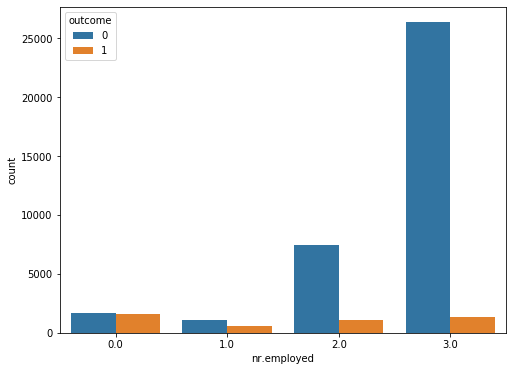

In [76]:
plt.figure(figsize=(8,6))
sns.countplot(x='nr.employed',hue='outcome',data=data_num)
plt.show()

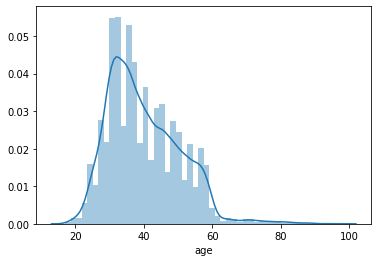

In [77]:
# have to categrize the numericals age, duration, euribor3m 
sns.distplot(data_num['age'])

In [78]:
data_num['age_band'] = pd.qcut(data_num['age'],3)
data_num['age_band'].value_counts()

(16.999, 34.0]    14754
(34.0, 44.0]      13500
(44.0, 98.0]      12934
Name: age_band, dtype: int64

In [79]:
data_num.loc[ data_num['age'] <= 34.0, 'age'] = 0
data_num.loc[(data_num['age'] > 34.0) & (data_num['age'] <= 44.0), 'age'] = 1
data_num.loc[data_num['age'] > 44, 'age'] = 2
data_num['age'].value_counts()

0    14754
1    13500
2    12934
Name: age, dtype: int64

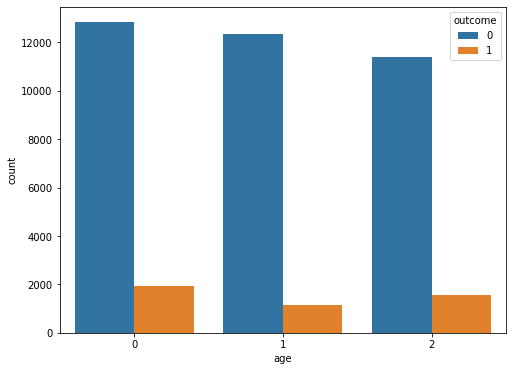

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(x='age',hue='outcome',data=data_num)
plt.show()

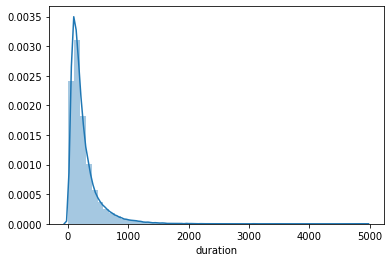

In [81]:
#duration
sns.distplot(data_num['duration'])
plt.show()
plt.close()

In [82]:
data_num['duration_band'] = pd.qcut(data_num['duration'], 3)
data_num['duration_band'].value_counts()

(-0.001, 126.0]    13832
(126.0, 258.0]     13691
(258.0, 4918.0]    13665
Name: duration_band, dtype: int64

In [83]:
data_num.loc[ data_num['duration'] <= 126.0, 'duration'] = 0
data_num.loc[(data_num['duration'] > 126.0) & (data_num['duration'] <= 258.0), 'duration'] = 1
data_num.loc[data_num['duration'] > 258.0, 'duration'] = 2
data_num['duration'].value_counts()

0    13832
1    13691
2    13665
Name: duration, dtype: int64

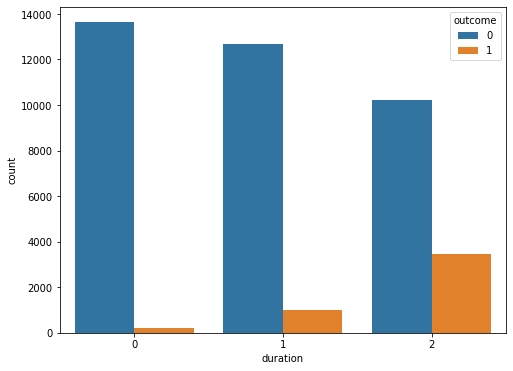

In [84]:
plt.figure(figsize=(8,6))
sns.countplot(x='duration',hue='outcome',data=data_num)
plt.show()

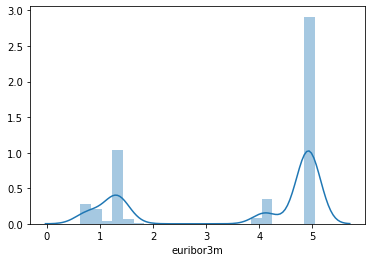

In [85]:
#euribor3m
sns.distplot(data_num['euribor3m'])
plt.show()
plt.close()

In [86]:
data_num['euribor3m_band'] = pd.qcut(data_num['euribor3m'], 3)
data_num['euribor3m_band'].value_counts()

(0.633, 4.021]    14188
(4.958, 5.045]    13601
(4.021, 4.958]    13399
Name: euribor3m_band, dtype: int64

In [87]:
data_num.loc[ data_num['euribor3m'] <= 4.021, 'euribor3m'] = 0
data_num.loc[(data_num['euribor3m'] > 4.021) & (data_num['euribor3m'] <= 4.958), 'euribor3m'] = 1
data_num.loc[data_num['euribor3m'] > 4.958, 'euribor3m'] = 2

In [88]:
data_num['euribor3m'].value_counts()

0.0    14188
2.0    13601
1.0    13399
Name: euribor3m, dtype: int64

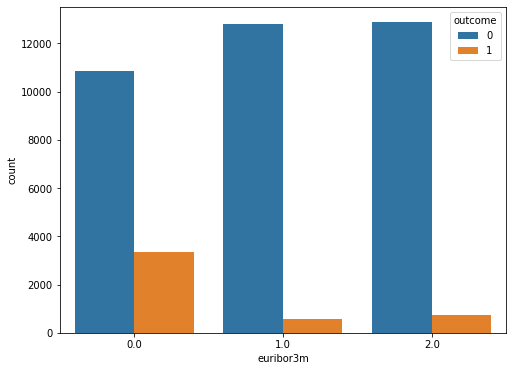

In [89]:
plt.figure(figsize=(8,6))
sns.countplot(x='euribor3m',hue='outcome',data=data_num)
plt.show()

In [90]:
data_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome,pdays_band,cons.price.idx_band,cons.conf.idx_band,nr.employed_band,age_band,duration_band,euribor3m_band
0,2,2,1,2,0,1.0,2.0,1.0,1.0,3.0,0,"(28.0, 35.0]","(93.484, 94.126]","(-38.85, -32.875]","(5161.975, 5228.1]","(44.0, 98.0]","(258.0, 4918.0]","(4.021, 4.958]"
1,2,1,1,2,0,1.0,2.0,1.0,1.0,3.0,0,"(28.0, 35.0]","(93.484, 94.126]","(-38.85, -32.875]","(5161.975, 5228.1]","(44.0, 98.0]","(126.0, 258.0]","(4.021, 4.958]"
2,1,1,1,2,0,1.0,2.0,1.0,1.0,3.0,0,"(28.0, 35.0]","(93.484, 94.126]","(-38.85, -32.875]","(5161.975, 5228.1]","(34.0, 44.0]","(126.0, 258.0]","(4.021, 4.958]"
3,1,1,1,2,0,1.0,2.0,1.0,1.0,3.0,0,"(28.0, 35.0]","(93.484, 94.126]","(-38.85, -32.875]","(5161.975, 5228.1]","(34.0, 44.0]","(126.0, 258.0]","(4.021, 4.958]"
4,2,2,1,2,0,1.0,2.0,1.0,1.0,3.0,0,"(28.0, 35.0]","(93.484, 94.126]","(-38.85, -32.875]","(5161.975, 5228.1]","(44.0, 98.0]","(258.0, 4918.0]","(4.021, 4.958]"


In [91]:
listRemove = data_num.columns.tolist()[-7:]

In [92]:
listRemove

['pdays_band',
 'cons.price.idx_band',
 'cons.conf.idx_band',
 'nr.employed_band',
 'age_band',
 'duration_band',
 'euribor3m_band']

In [93]:
data_num1 = data_num.drop(listRemove, axis = 1)

In [94]:
data_num1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,2,2,1,2,0,1.0,2.0,1.0,1.0,3.0,0
1,2,1,1,2,0,1.0,2.0,1.0,1.0,3.0,0
2,1,1,1,2,0,1.0,2.0,1.0,1.0,3.0,0
3,1,1,1,2,0,1.0,2.0,1.0,1.0,3.0,0
4,2,2,1,2,0,1.0,2.0,1.0,1.0,3.0,0


In [138]:
data_num1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'outcome'],
      dtype='object')

In [139]:
data_num_scaled = bank.loc[:,['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [140]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data_num_scaled)
abc = scaler.transform(data_num_scaled)
Numeric_Scaled = pd.DataFrame(abc, columns=data_num_scaled.columns.tolist())

In [95]:
data_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,outcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0


In [96]:
data_cat1 = data_cat.drop(['outcome'], axis = 1)

In [97]:
data_cat1 = pd.get_dummies(data=data_cat1, columns=catCols, drop_first=True)

In [98]:
data_cat1.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [99]:
data = pd.concat([data_cat1, data_num1], axis = 1)
data.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,0,0,1,0,0,0,0,0,0,0,...,2,1,2,0,1.0,2.0,1.0,1.0,3.0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,1,2,0,1.0,2.0,1.0,1.0,3.0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,1,2,0,1.0,2.0,1.0,1.0,3.0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0,1.0,2.0,1.0,1.0,3.0,0
4,0,0,0,0,0,0,1,0,0,0,...,2,1,2,0,1.0,2.0,1.0,1.0,3.0,0


In [141]:
data2 = pd.concat([data_cat1, Numeric_Scaled], axis = 1)

In [143]:
data2['outcome'] = bank['outcome']

In [144]:
data2.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,0,0,1,0,0,0,0,0,0,0,...,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,0,0,0,0,0,0,1,0,0,0,...,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,0,0,0,0,0,0,1,0,0,0,...,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,0,0,0,0,0,0,0,0,0,0,...,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,0,0,0,0,0,0,1,0,0,0,...,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0


## MODELLING

### Combination 1 : Cut Numeric and dummy categorical

In [100]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from confusionMatrix import plotConfusionMatrix

In [101]:
y = data['outcome']
X = data.iloc[:,0:-1]

In [102]:
X.shape, y.shape

((41188, 52), (41188,))

In [103]:
## Method 0: without SMOTE---------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train.ravel()) 
clf.score(X_test, y_test)
predictions_ = clf.predict(X_test) 

In [104]:
clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')>

WITHOUT IMBALANCE TREATMENT:
********************************************************************************
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     10969
           1       0.42      0.45      0.43      1388

    accuracy                           0.87     12357
   macro avg       0.67      0.68      0.68     12357
weighted avg       0.87      0.87      0.87     12357

********************************************************************************
[[10097   872]
 [  767   621]]
********************************************************************************
********************************************************************************


1493

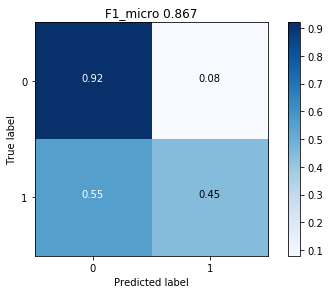

In [105]:
print('Without imbalance treatment:'.upper())
print('*'*80)
print(classification_report(y_test, predictions_)) 
print('*'*80)
print(confusion_matrix(y_test, predictions_))
print('*'*80)
f1= f1_score(y_test,predictions_, average='micro')
plt.figure()
cnf_mat = confusion_matrix(y_test,predictions_)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)
#print('\n')
sum(y_test == 0)
sum(y_test == 1)
sum(predictions_ == 0)
sum(predictions_ == 1)

####  Cross Validation on Normal train-test split

In [106]:
# K fold Coss- validation :
from sklearn.model_selection import cross_val_score
CV_Score = cross_val_score(clf, X_train, y_train, cv=20)
CV_Score

array([0.87309293, 0.870319  , 0.86407767, 0.85506241, 0.86269071,
       0.86962552, 0.870319  , 0.86338419, 0.86962552, 0.87239945,
       0.85159501, 0.85773768, 0.86328938, 0.87855656, 0.85773768,
       0.83830673, 0.87578071, 0.85912561, 0.88063845, 0.85426787])

In [107]:
CV_Score.mean()

0.8643816033518101

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
#stratified K-Fold

from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf = StratifiedKFold(n_splits= 10, random_state= None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
    print ("Train:", train_index, "Validation:", test_index)
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X1_train,y1_train)
    prediction = clf.predict(X1_test)
    score = accuracy_score(prediction, y1_test)
    accuracy.append(score)

print(accuracy)
np.array(accuracy).mean()

Train: [ 3760  3761  3762 ... 41185 41186 41187] Validation: [    0     1     2 ... 12857 12866 12876]
Train: [    0     1     2 ... 41185 41186 41187] Validation: [ 3760  3761  3762 ... 20213 20230 20234]
Train: [    0     1     2 ... 41185 41186 41187] Validation: [ 7537  7538  7539 ... 27797 27802 27803]
Train: [    0     1     2 ... 41185 41186 41187] Validation: [11358 11359 11360 ... 30310 30311 30312]
Train: [    0     1     2 ... 41185 41186 41187] Validation: [15239 15240 15241 ... 35544 35552 35554]
Train: [    0     1     2 ... 41185 41186 41187] Validation: [19128 19129 19131 ... 37165 37169 37171]
Train: [    0     1     2 ... 41185 41186 41187] Validation: [23008 23009 23010 ... 38452 38453 38455]
Train: [    0     1     2 ... 41185 41186 41187] Validation: [26878 26879 26880 ... 39384 39385 39386]
Train: [    0     1     2 ... 41185 41186 41187] Validation: [31243 31244 31245 ... 40243 40244 40245]
Train: [    0     1     2 ... 40243 40244 40245] Validation: [35180 35184

0.6318523559840259

In [110]:
#using under Sampling technique :
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_undersample, y_undersample = nm.fit_sample (X,y.ravel())

In [111]:
X_undersample.shape, y_undersample.shape

((9280, 52), (9280,))

In [112]:
from collections import Counter
print('original shape {}'.format (Counter(y)))
print('Resampled shape {}'.format (Counter(y_undersample)))

original shape Counter({0: 36548, 1: 4640})
Resampled shape Counter({0: 4640, 1: 4640})


In [113]:
#split into 70:30 ratio 
X_train_undersample, X_val_undersample, y_train_undersample, y_val_undersample = train_test_split(X_undersample, 
                                        y_undersample, test_size = 0.3, random_state = 0)

clf.fit(X_train_undersample, y_train_undersample.ravel()) 
clf.score(X_train_undersample, y_train_undersample)
clf.score(X_val_undersample, y_val_undersample)

predictions_undersample = clf.predict(X_val_undersample) 

AFTER IMBALANCE TREATMENT:
              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1393
           1       0.71      0.68      0.69      1391

    accuracy                           0.70      2784
   macro avg       0.70      0.70      0.70      2784
weighted avg       0.70      0.70      0.70      2784

[[1005  388]
 [ 449  942]]
********************************************************************************


array([[1005,  388],
       [ 449,  942]], dtype=int64)

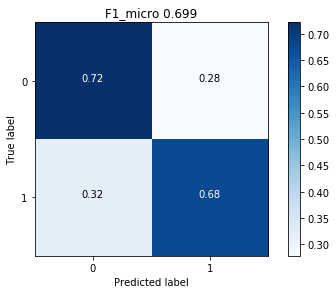

In [114]:
# print classification report 
print('After imbalance treatment:'.upper())
print(classification_report(y_val_undersample, predictions_undersample)) 
print(confusion_matrix(y_val_undersample, predictions_undersample))
f1= f1_score(y_val_undersample,predictions_undersample, average='micro')
plt.figure()
cnf_mat_undersample = confusion_matrix(y_val_undersample,predictions_undersample)
plotConfusionMatrix(cnf_mat_undersample, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)
#print('\n')

sum(y_val_undersample == 0)
sum(y_val_undersample == 1)
sum(predictions_undersample == 0)
sum(predictions_undersample == 1)

confusion_matrix(y_val_undersample, predictions_undersample)

In [115]:
# K fold Coss- validation :
from sklearn.model_selection import cross_val_score
CV_Score_undersample = cross_val_score(clf, X_undersample, y_undersample, cv=10)
CV_Score_undersample

array([0.16810345, 0.39331897, 0.44827586, 0.52047414, 0.47413793,
       0.56573276, 0.50323276, 0.60237069, 0.78663793, 0.64547414])

In [116]:
#using Random OverSampling technique :

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_oversample, y_oversample = ros.fit_sample (X,y)
X_oversample.shape, y_oversample.shape

((73096, 52), (73096,))

In [117]:
print('original shape {}'.format (Counter(y)))
print('Resampled shape {}'.format (Counter(y_oversample)))

original shape Counter({0: 36548, 1: 4640})
Resampled shape Counter({0: 36548, 1: 36548})


AFTER IMBALANCE TREATMENT:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     10857
           1       0.91      1.00      0.95     11072

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929

[[ 9826  1031]
 [   51 11021]]
********************************************************************************


array([[ 9826,  1031],
       [   51, 11021]], dtype=int64)

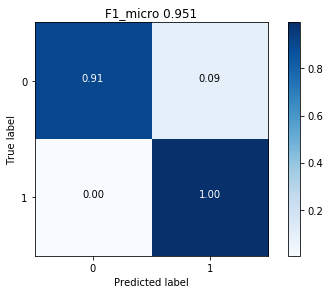

In [118]:
#split into 70:30 ratio 
X_train_oversample, X_val_oversample, y_train_oversample, y_val_oversample = train_test_split(X_oversample, 
                                        y_oversample, test_size = 0.3, random_state = 0)

clf.fit(X_train_oversample, y_train_oversample.ravel()) 
clf.score(X_train_oversample, y_train_oversample)
clf.score(X_val_oversample, y_val_oversample)

predictions_oversample = clf.predict(X_val_oversample) 


# print classification report 
print('After imbalance treatment:'.upper())
print(classification_report(y_val_oversample, predictions_oversample)) 
print(confusion_matrix(y_val_oversample, predictions_oversample))
f1= f1_score(y_val_oversample,predictions_oversample, average='micro')
plt.figure()
cnf_mat_oversample = confusion_matrix(y_val_oversample,predictions_oversample)
plotConfusionMatrix(cnf_mat_oversample, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)
#print('\n')

sum(y_val_oversample == 0)
sum(y_val_oversample == 1)
sum(predictions_oversample == 0)
sum(predictions_oversample == 1)

confusion_matrix(y_val_oversample, predictions_oversample)

In [119]:
## Method1: SMOTE on Train

sm = SMOTE(random_state = 2) 
X_smote, y_smote = sm.fit_sample(X_train, y_train.ravel()) 

print('With imbalance treatment:'.upper())
print('After OverSampling, X: {}'.format(X_smote.shape)) 
print('After OverSampling, y: {}'.format(y_smote.shape)) 
print("After OverSampling, counts of '1': {}".format(sum(y_smote == 1))) 
print("After OverSampling, counts of '0': {}".format(sum(y_smote == 0))) 
print('\n')

WITH IMBALANCE TREATMENT:
After OverSampling, X: (51158, 52)
After OverSampling, y: (51158,)
After OverSampling, counts of '1': 25579
After OverSampling, counts of '0': 25579




In [120]:
#split into 70:30 ratio 
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_smote, y_smote, 
                    test_size = 0.3, random_state = 0)

clf.fit(X_train_smote, y_train_smote.ravel()) 
clf.score(X_val_smote, y_val_smote)

predictions_smote = clf.predict(X_val_smote) 

AFTER IMBALANCE TREATMENT:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      7651
           1       0.88      0.93      0.90      7697

    accuracy                           0.90     15348
   macro avg       0.90      0.90      0.90     15348
weighted avg       0.90      0.90      0.90     15348

********************************************************************************
[[6682  969]
 [ 568 7129]]
********************************************************************************
********************************************************************************


array([[6682,  969],
       [ 568, 7129]], dtype=int64)

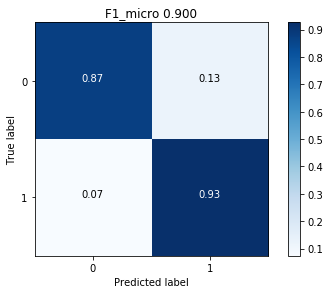

In [121]:
# print classification report on Validation set 
print('After imbalance treatment:'.upper())
print(classification_report(y_val_smote, predictions_smote)) 
print('*'*80)
print(confusion_matrix(y_val_smote, predictions_smote))
print('*'*80)
f1= f1_score(y_val_smote,predictions_smote, average='micro')
plt.figure()
cnf_mat_smote = confusion_matrix(y_val_smote,predictions_smote)
plotConfusionMatrix(cnf_mat_smote, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)
#print('\n')

sum(y_val_smote == 0)
sum(y_val_smote == 1)
sum(predictions_smote == 0)
sum(predictions_smote == 1)

confusion_matrix(y_val_smote, predictions_smote)


AFTER IMBALANCE TREATMENT:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     10969
           1       0.35      0.51      0.42      1388

    accuracy                           0.84     12357
   macro avg       0.64      0.70      0.66     12357
weighted avg       0.87      0.84      0.85     12357

********************************************************************************
[[9661 1308]
 [ 677  711]]
********************************************************************************
********************************************************************************


array([[9661, 1308],
       [ 677,  711]], dtype=int64)

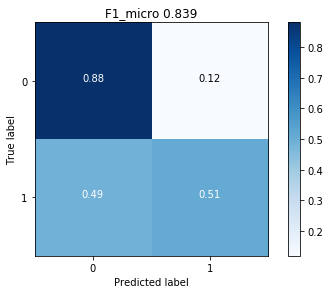

In [122]:
## Checking on actual Test Data :

clf.fit(X_train_smote, y_train_smote.ravel()) 
clf.score(X_test, y_test)

predictions_smote = clf.predict(X_test) 

# print classification report on Validation set 
print('After imbalance treatment:'.upper())
print(classification_report(y_test, predictions_smote)) 
print('*'*80)
print(confusion_matrix(y_test, predictions_smote))
print('*'*80)
f1= f1_score(y_test,predictions_smote, average='micro')
plt.figure()
cnf_mat_smote = confusion_matrix(y_test,predictions_smote)
plotConfusionMatrix(cnf_mat_smote, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)
#print('\n')

sum(y_test == 0)
sum(y_test == 1)
sum(predictions_smote == 0)
sum(predictions_smote == 1)

confusion_matrix(y_test, predictions_smote)


### Grid Search with SMOTE

GRID SEARCH WITH SMOTE -- DT:
Using best parameters: {'max_depth': 9}
********************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.79      0.87     10969
           1       0.31      0.76      0.44      1388

    accuracy                           0.79     12357
   macro avg       0.64      0.77      0.66     12357
weighted avg       0.89      0.79      0.82     12357

********************************************************************************
[[8675 2294]
 [ 335 1053]]
********************************************************************************
********************************************************************************


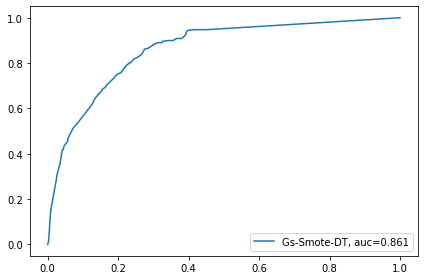

In [123]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

#parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
parameters = {'max_depth': np.arange(3, 10)} # pruning
tree = GridSearchCV(clf,parameters)
tree.fit(X_train_smote,y_train_smote)
preds = tree.predict(X_test)

print('GRID SEARCH WITH SMOTE -- DT:')
print('Using best parameters:',tree.best_params_)
print('*'*80)
print(classification_report(y_test, preds)) 
print('*'*80)
print(confusion_matrix(y_test, preds))
print('*'*80)

y_pred_proba_ = tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_)
auc = roc_auc_score(y_test, y_pred_proba_)
plt.plot(fpr,tpr,label="Gs-Smote-DT, auc="+str(np.round(auc,3)))
plt.legend(loc=4)
plt.tight_layout()

print('*'*80)

#### GRID SEARCH WITH SMOTE with CROSS VALIDATION---------------------------------

GRID SEARCH WITH SMOTE & CROSS VALIDATION -- DT:
Using best parameters: {'criterion': 'entropy', 'max_depth': 28}
GRID SEARCH WITH SMOTE -- DT:
Using best parameters: {'criterion': 'entropy', 'max_depth': 28}
********************************************************************************
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10969
           1       0.37      0.49      0.42      1388

    accuracy                           0.85     12357
   macro avg       0.65      0.69      0.67     12357
weighted avg       0.87      0.85      0.86     12357

********************************************************************************
[[9811 1158]
 [ 702  686]]
********************************************************************************


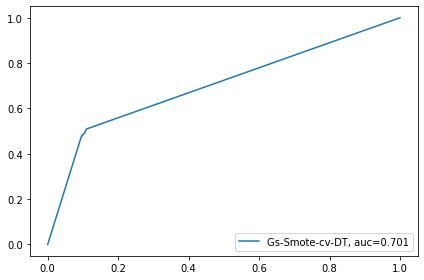

In [124]:
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(15, 30)}
    # decision tree model
    dtree_model = DecisionTreeClassifier()
    #use gridsearch to val all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    #find score
    score = dtree_gscv.score(X, y)
    
    return dtree_gscv.best_params_, score, dtree_gscv

print('GRID SEARCH WITH SMOTE & CROSS VALIDATION -- DT:')
best_param, acc, model = dtree_grid_search(X_smote,y_smote, 4)
print('Using best parameters:',best_param)
pred = model.predict(X_test)

print('GRID SEARCH WITH SMOTE -- DT:')
print('Using best parameters:',model.best_params_)
print('*'*80)
print(classification_report(y_test, pred)) 
print('*'*80)
print(confusion_matrix(y_test, pred))
print('*'*80)

## ROC curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Gs-Smote-cv-DT, auc="+str(np.round(auc,3)))
plt.legend(loc=4)
plt.tight_layout()

### Random Forest 

********************************************************************************
GRID SEARCH WITHOUT SMOTE & CROSS VALIDATION -- RF:
Using best parameters: {'criterion': 'entropy', 'max_depth': 28}
********************************************************************************
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.71      0.32      0.44      1388

    accuracy                           0.91     12357
   macro avg       0.82      0.65      0.69     12357
weighted avg       0.90      0.91      0.89     12357

********************************************************************************
[[10792   177]
 [  949   439]]
********************************************************************************


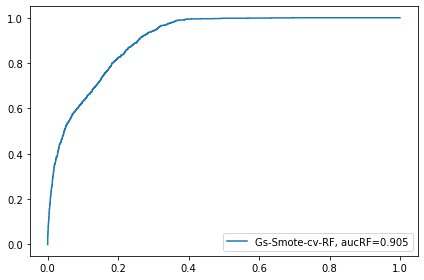

In [125]:
from sklearn.ensemble import RandomForestClassifier

def RF_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(11, 19),
                  'n_estimators': [100,300]}
    #randomForest model without gridSrearch
    rf = RandomForestClassifier()
    #use gridsearch to val all values
    rf_gscv = GridSearchCV(rf, param_grid, cv=nfolds)
    #fit model to data
    rf_gscv.fit(X, y) # with grid search
    #find score
    score_gscv = rf_gscv.score(X, y) # with grid search
    
    return rf, rf_gscv.best_params_, rf_gscv, score_gscv  

print('*'*80)
print('GRID SEARCH WITHOUT SMOTE & CROSS VALIDATION -- RF:')
rf, best_param_rf, model_rf, acc_rf = RF_grid_search(X_train,y_train, 4)
pred_rf = model_rf.predict(X_test)

print('Using best parameters:',model.best_params_)
print('*'*80)
print(classification_report(y_test, pred_rf)) 
print('*'*80)
print(confusion_matrix(y_test, pred_rf))
print('*'*80)
## ROC curve
y_pred_proba_rf = model_rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf,tpr_rf,label="Gs-Smote-cv-RF, aucRF="+str(np.round(auc_rf,3)))
plt.legend(loc=4)
plt.tight_layout()

********************************************************************************
GRID SEARCH WITHOUT SMOTE RF:
********************************************************************************
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.71      0.32      0.44      1388

    accuracy                           0.91     12357
   macro avg       0.82      0.65      0.69     12357
weighted avg       0.90      0.91      0.89     12357

********************************************************************************
[[10792   177]
 [  949   439]]
********************************************************************************


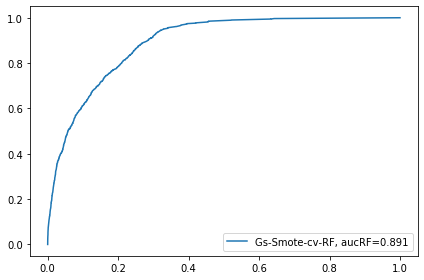

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)
print('*'*80)
print('GRID SEARCH WITHOUT SMOTE RF:')
pred_clf = rf_clf.predict(X_test)

print('*'*80)
print(classification_report(y_test, pred_rf)) 
print('*'*80)
print(confusion_matrix(y_test, pred_rf))
print('*'*80)
## ROC curve
y_pred_proba_rf = rf_clf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf,tpr_rf,label="Gs-Smote-cv-RF, aucRF="+str(np.round(auc_rf,3)))
plt.legend(loc=4)
plt.tight_layout()

********************************************************************************
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10969
           1       0.60      0.37      0.46      1388

    accuracy                           0.90     12357
   macro avg       0.76      0.67      0.70     12357
weighted avg       0.89      0.90      0.89     12357

********************************************************************************
[[10628   341]
 [  868   520]]
********************************************************************************


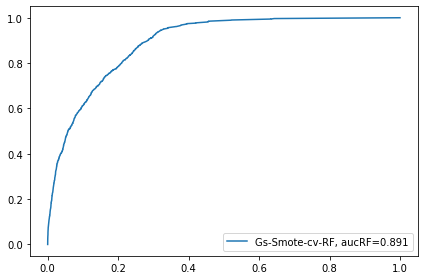

In [128]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid={}, cv= 10)
grid_search.fit(X_train, y_train)
cvrf_clf=grid_search.best_estimator_
pred_clf = cvrf_clf.predict(X_test)
print('*'*80)
print(classification_report(y_test, pred_clf)) 
print('*'*80)
print(confusion_matrix(y_test, pred_clf))
print('*'*80)
## ROC curve
y_pred_proba_rf = cvrf_clf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf,tpr_rf,label="Gs-Smote-cv-RF, aucRF="+str(np.round(auc_rf,3)))
plt.legend(loc=4)
plt.tight_layout()

### With SMOTE

********************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     10969
           1       0.43      0.58      0.50      1388

    accuracy                           0.87     12357
   macro avg       0.69      0.74      0.71     12357
weighted avg       0.89      0.87      0.88     12357

********************************************************************************
[[9905 1064]
 [ 581  807]]
********************************************************************************


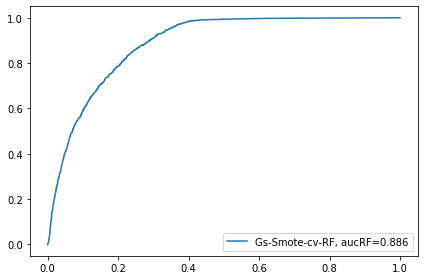

In [130]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid={}, cv= 10)
grid_search.fit(X_train_smote, y_train_smote)
cvrf_clfs=grid_search.best_estimator_
pred_clfs = cvrf_clfs.predict(X_test)
print('*'*80)
print(classification_report(y_test, pred_clfs)) 
print('*'*80)
print(confusion_matrix(y_test, pred_clfs))
print('*'*80)
## ROC curve
y_pred_proba_rfs = cvrf_clfs.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test,  y_pred_proba_rfs)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rfs)
plt.plot(fpr_rf,tpr_rf,label="Gs-Smote-cv-RF, aucRF="+str(np.round(auc_rf,3)))
plt.legend(loc=4)
plt.tight_layout()

### XG Boost Method

********************************************************************************
XGB Without SMOTE
********************************************************************************
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.68      0.36      0.48      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.90      0.91      0.90     12357

********************************************************************************
[[10734   235]
 [  882   506]]
********************************************************************************


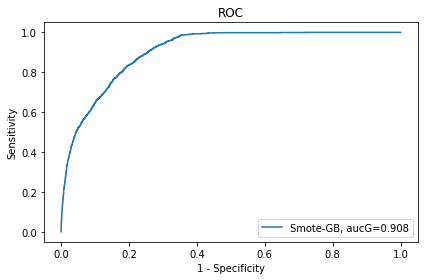

In [131]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model_G = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model_G.fit(X_train, y_train)

# make predictions for test set
y_pred = model_G.predict(X_test)
preds = [round(value) for value in y_pred]

print('*'*80)
print('XGB Without SMOTE')
print('*'*80)
print(classification_report(y_test, y_pred)) 
print('*'*80)
print(confusion_matrix(y_test, y_pred))
print('*'*80)
y_pred_proba_G = model_G.predict_proba(X_test)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test,  y_pred_proba_G)
auc_G = metrics.roc_auc_score(y_test, y_pred_proba_G)
plt.plot(fpr_G,tpr_G,label="Smote-GB, aucG="+str(np.round(auc_G,3)))
plt.legend(loc=4)
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.title('ROC')
plt.tight_layout()

********************************************************************************
SMOTE with XGB
********************************************************************************
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10969
           1       0.68      0.38      0.48      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357

********************************************************************************
[[10721   248]
 [  866   522]]
********************************************************************************


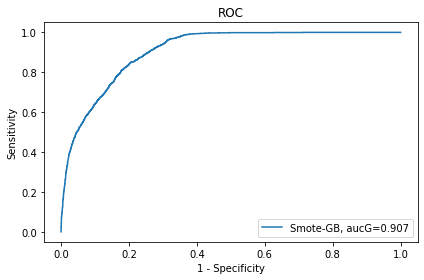

In [135]:
from sklearn.model_selection import GridSearchCV
model_Gb= XGBClassifier(max_depth = 5, n_estimators=1000, learning_rate=0.03, n_jobs=1)
grid_search = GridSearchCV(model_Gb, param_grid={}, n_jobs=1, cv = 10, scoring = "accuracy")
grid_search.fit(X_train, y_train)
cvxg_clf= grid_search.best_estimator_
y_pred = cvxg_clf.predict(X_test)
pred = [round(value) for value in y_pred]

print('*'*80)
print('SMOTE with XGB')
print('*'*80)
print(classification_report(y_test, y_pred)) 
print('*'*80)
print(confusion_matrix(y_test, y_pred))
print('*'*80)
y_pred_proba_G = cvxg_clf.predict_proba(X_test)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test,  y_pred_proba_G)
auc_G = metrics.roc_auc_score(y_test, y_pred_proba_G)
plt.plot(fpr_G,tpr_G,label="Smote-GB, aucG="+str(np.round(auc_G,3)))
plt.legend(loc=4)
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.title('ROC')
plt.tight_layout()

#### With SMOTE

********************************************************************************
SMOTE with XGB
********************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.89      0.92     10969
           1       0.41      0.58      0.48      1388

    accuracy                           0.86     12357
   macro avg       0.68      0.74      0.70     12357
weighted avg       0.88      0.86      0.87     12357

********************************************************************************
[[9810 1159]
 [ 579  809]]
********************************************************************************


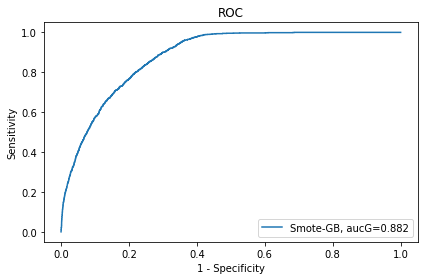

In [133]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model_Gs = XGBClassifier(learning_rate = 0.05, n_estimators=500, max_depth=7)
model_Gs.fit(X_train_smote, y_train_smote)

# make predictions for test set
y_pred = model_Gs.predict(X_test)
preds = [round(value) for value in y_pred]

print('*'*80)
print('SMOTE with XGB')
print('*'*80)
print(classification_report(y_test, y_pred)) 
print('*'*80)
print(confusion_matrix(y_test, y_pred))
print('*'*80)
y_pred_proba_G = model_Gs.predict_proba(X_test)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test,  y_pred_proba_G)
auc_G = metrics.roc_auc_score(y_test, y_pred_proba_G)
plt.plot(fpr_G,tpr_G,label="Smote-GB, aucG="+str(np.round(auc_G,3)))
plt.legend(loc=4)
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.title('ROC')
plt.tight_layout()

********************************************************************************
SMOTE with XGB
********************************************************************************
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10969
           1       0.68      0.38      0.48      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357

********************************************************************************
[[10721   248]
 [  866   522]]
********************************************************************************


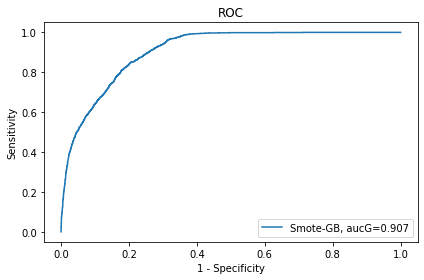

In [137]:
from sklearn.model_selection import GridSearchCV
model_Gbs= XGBClassifier(max_depth = 5, n_estimators=1000, learning_rate=0.03, n_jobs=1)
grid_searchs = GridSearchCV(model_Gbs, param_grid={}, n_jobs=1, cv = 10, scoring = "accuracy")
grid_searchs.fit(X_train_smote, y_train_smote)
cvxgs_clf= grid_search.best_estimator_
y_pred = cvxgs_clf.predict(X_test)
pred = [round(value) for value in y_pred]

print('*'*80)
print('SMOTE with XGB')
print('*'*80)
print(classification_report(y_test, y_pred)) 
print('*'*80)
print(confusion_matrix(y_test, y_pred))
print('*'*80)
y_pred_proba_G = cvxgs_clf.predict_proba(X_test)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test,  y_pred_proba_G)
auc_G = metrics.roc_auc_score(y_test, y_pred_proba_G)
plt.plot(fpr_G,tpr_G,label="Smote-GB, aucG="+str(np.round(auc_G,3)))
plt.legend(loc=4)
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.title('ROC')
plt.tight_layout()

### Combination 2 : Scaled Numeric + Dummy category

In [145]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from confusionMatrix import plotConfusionMatrix

In [146]:
y = data2['outcome']
X = data2.iloc[:,0:-1]

In [147]:
X.shape, y.shape

((41188, 52), (41188,))

In [148]:
## Method 0: without SMOTE---------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train.ravel()) 
clf.score(X_test, y_test)
predictions_ = clf.predict(X_test) 

In [152]:
## Method1: SMOTE on Train

sm = SMOTE(random_state = 2) 
X_smote, y_smote = sm.fit_sample(X_train, y_train.ravel()) 

print('With imbalance treatment:'.upper())
print('After OverSampling, X: {}'.format(X_smote.shape)) 
print('After OverSampling, y: {}'.format(y_smote.shape)) 
print("After OverSampling, counts of '1': {}".format(sum(y_smote == 1))) 
print("After OverSampling, counts of '0': {}".format(sum(y_smote == 0))) 
print('\n')

WITH IMBALANCE TREATMENT:
After OverSampling, X: (51158, 52)
After OverSampling, y: (51158,)
After OverSampling, counts of '1': 25579
After OverSampling, counts of '0': 25579




WITHOUT IMBALANCE TREATMENT:
********************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10969
           1       0.52      0.54      0.53      1388

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.74     12357
weighted avg       0.89      0.89      0.89     12357

********************************************************************************
[[10286   683]
 [  636   752]]
********************************************************************************
********************************************************************************


1435

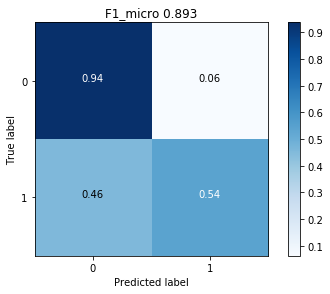

In [149]:
print('Without imbalance treatment:'.upper())
print('*'*80)
print(classification_report(y_test, predictions_)) 
print('*'*80)
print(confusion_matrix(y_test, predictions_))
print('*'*80)
f1= f1_score(y_test,predictions_, average='micro')
plt.figure()
cnf_mat = confusion_matrix(y_test,predictions_)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)
#print('\n')
sum(y_test == 0)
sum(y_test == 1)
sum(predictions_ == 0)
sum(predictions_ == 1)

### SMOTE on DT

AFTER IMBALANCE TREATMENT:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73     10969
           1       0.18      0.69      0.28      1388

    accuracy                           0.61     12357
   macro avg       0.56      0.64      0.51     12357
weighted avg       0.85      0.61      0.68     12357

********************************************************************************
[[6561 4408]
 [ 428  960]]
********************************************************************************
********************************************************************************


array([[6561, 4408],
       [ 428,  960]], dtype=int64)

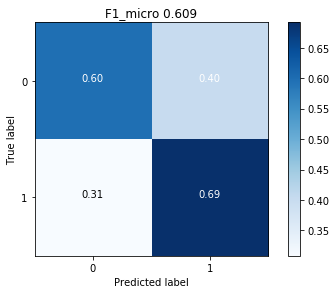

In [153]:
## Checking on actual Test Data :

clf.fit(X_train_smote, y_train_smote.ravel()) 
clf.score(X_test, y_test)

predictions_smote = clf.predict(X_test) 

# print classification report on Validation set 
print('After imbalance treatment:'.upper())
print(classification_report(y_test, predictions_smote)) 
print('*'*80)
print(confusion_matrix(y_test, predictions_smote))
print('*'*80)
f1= f1_score(y_test,predictions_smote, average='micro')
plt.figure()
cnf_mat_smote = confusion_matrix(y_test,predictions_smote)
plotConfusionMatrix(cnf_mat_smote, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)
#print('\n')

sum(y_test == 0)
sum(y_test == 1)
sum(predictions_smote == 0)
sum(predictions_smote == 1)

confusion_matrix(y_test, predictions_smote)

### Grid Search With Cross Validation

GRID SEARCH WITH SMOTE -- DT:
Using best parameters: {'max_depth': 9}
********************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.39      0.55     10969
           1       0.14      0.82      0.25      1388

    accuracy                           0.44     12357
   macro avg       0.54      0.60      0.40     12357
weighted avg       0.85      0.44      0.52     12357

********************************************************************************
[[4273 6696]
 [ 256 1132]]
********************************************************************************
********************************************************************************


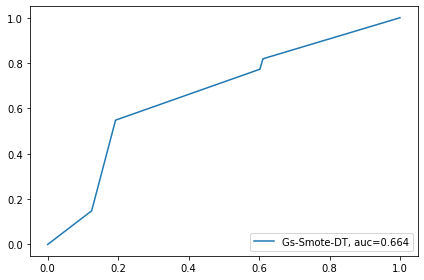

In [154]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

#parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
parameters = {'max_depth': np.arange(3, 10)} # pruning
tree = GridSearchCV(clf,parameters)
tree.fit(X_train_smote,y_train_smote)
preds = tree.predict(X_test)

print('GRID SEARCH WITH SMOTE -- DT:')
print('Using best parameters:',tree.best_params_)
print('*'*80)
print(classification_report(y_test, preds)) 
print('*'*80)
print(confusion_matrix(y_test, preds))
print('*'*80)

y_pred_proba_ = tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_)
auc = roc_auc_score(y_test, y_pred_proba_)
plt.plot(fpr,tpr,label="Gs-Smote-DT, auc="+str(np.round(auc,3)))
plt.legend(loc=4)
plt.tight_layout()

print('*'*80)

### Grid Search with SMOTE & CV

GRID SEARCH WITH SMOTE & CROSS VALIDATION -- DT:
Using best parameters: {'criterion': 'entropy', 'max_depth': 23}
GRID SEARCH WITH SMOTE -- DT:
Using best parameters: {'criterion': 'entropy', 'max_depth': 23}
********************************************************************************
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10969
           1       0.48      0.60      0.53      1388

    accuracy                           0.88     12357
   macro avg       0.71      0.76      0.73     12357
weighted avg       0.89      0.88      0.89     12357

********************************************************************************
[[10061   908]
 [  556   832]]
********************************************************************************


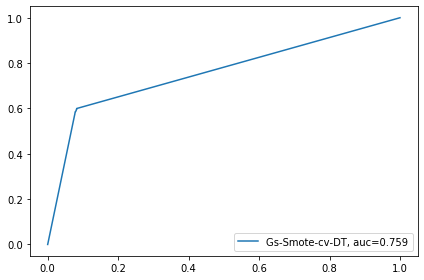

In [155]:
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(15, 30)}
    # decision tree model
    dtree_model = DecisionTreeClassifier()
    #use gridsearch to val all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    #find score
    score = dtree_gscv.score(X, y)
    
    return dtree_gscv.best_params_, score, dtree_gscv

print('GRID SEARCH WITH SMOTE & CROSS VALIDATION -- DT:')
best_param, acc, model = dtree_grid_search(X_smote,y_smote, 4)
print('Using best parameters:',best_param)
pred = model.predict(X_test)

print('GRID SEARCH WITH SMOTE -- DT:')
print('Using best parameters:',model.best_params_)
print('*'*80)
print(classification_report(y_test, pred)) 
print('*'*80)
print(confusion_matrix(y_test, pred))
print('*'*80)

## ROC curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Gs-Smote-cv-DT, auc="+str(np.round(auc,3)))
plt.legend(loc=4)
plt.tight_layout()

## Random Forest

********************************************************************************
GRID SEARCH WITHOUT SMOTE & CROSS VALIDATION -- RF:
Using best parameters: {'criterion': 'entropy', 'max_depth': 23}
********************************************************************************
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10969
           1       0.69      0.46      0.55      1388

    accuracy                           0.92     12357
   macro avg       0.81      0.72      0.75     12357
weighted avg       0.91      0.92      0.91     12357

********************************************************************************
[[10685   284]
 [  755   633]]
********************************************************************************


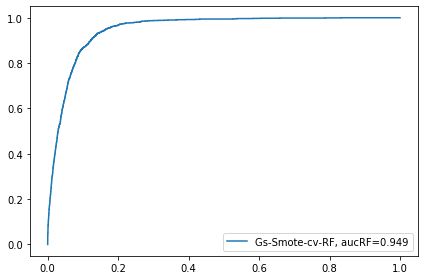

In [156]:
from sklearn.ensemble import RandomForestClassifier

def RF_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(11, 19),
                  'n_estimators': [100,300]}
    #randomForest model without gridSrearch
    rf = RandomForestClassifier()
    #use gridsearch to val all values
    rf_gscv = GridSearchCV(rf, param_grid, cv=nfolds)
    #fit model to data
    rf_gscv.fit(X, y) # with grid search
    #find score
    score_gscv = rf_gscv.score(X, y) # with grid search
    
    return rf, rf_gscv.best_params_, rf_gscv, score_gscv  

print('*'*80)
print('GRID SEARCH WITHOUT SMOTE & CROSS VALIDATION -- RF:')
rf, best_param_rf, model_rf, acc_rf = RF_grid_search(X_train,y_train, 4)
pred_rf = model_rf.predict(X_test)

print('Using best parameters:',model.best_params_)
print('*'*80)
print(classification_report(y_test, pred_rf)) 
print('*'*80)
print(confusion_matrix(y_test, pred_rf))
print('*'*80)
## ROC curve
y_pred_proba_rf = model_rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf,tpr_rf,label="Gs-Smote-cv-RF, aucRF="+str(np.round(auc_rf,3)))
plt.legend(loc=4)
plt.tight_layout()

********************************************************************************
GRID SEARCH WITHOUT SMOTE RF:
********************************************************************************
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10969
           1       0.69      0.46      0.55      1388

    accuracy                           0.92     12357
   macro avg       0.81      0.72      0.75     12357
weighted avg       0.91      0.92      0.91     12357

********************************************************************************
[[10685   284]
 [  755   633]]
********************************************************************************


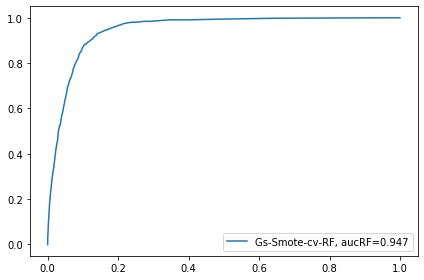

In [157]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)
print('*'*80)
print('GRID SEARCH WITHOUT SMOTE RF:')
pred_clf = rf_clf.predict(X_test)

print('*'*80)
print(classification_report(y_test, pred_rf)) 
print('*'*80)
print(confusion_matrix(y_test, pred_rf))
print('*'*80)
## ROC curve
y_pred_proba_rf = rf_clf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf,tpr_rf,label="Gs-Smote-cv-RF, aucRF="+str(np.round(auc_rf,3)))
plt.legend(loc=4)
plt.tight_layout()

#### With Grid Search CV

********************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10969
           1       0.68      0.48      0.56      1388

    accuracy                           0.92     12357
   macro avg       0.81      0.73      0.76     12357
weighted avg       0.91      0.92      0.91     12357

********************************************************************************
[[10649   320]
 [  722   666]]
********************************************************************************


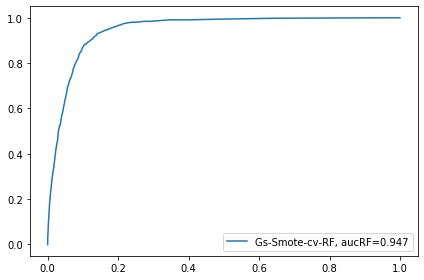

In [158]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid={}, cv= 10)
grid_search.fit(X_train, y_train)
cvrf_clf=grid_search.best_estimator_
pred_clf = cvrf_clf.predict(X_test)
print('*'*80)
print(classification_report(y_test, pred_clf)) 
print('*'*80)
print(confusion_matrix(y_test, pred_clf))
print('*'*80)
## ROC curve
y_pred_proba_rf = cvrf_clf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr_rf,tpr_rf,label="Gs-Smote-cv-RF, aucRF="+str(np.round(auc_rf,3)))
plt.legend(loc=4)
plt.tight_layout()

### RF With SMOTE and GridSearch CV:

********************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     10969
           1       0.22      0.84      0.35      1388

    accuracy                           0.65     12357
   macro avg       0.59      0.73      0.55     12357
weighted avg       0.88      0.65      0.71     12357

********************************************************************************
[[6850 4119]
 [ 222 1166]]
********************************************************************************


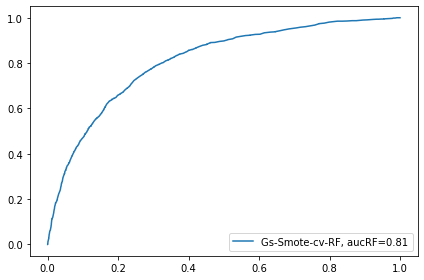

In [159]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid={}, cv= 10)
grid_search.fit(X_train_smote, y_train_smote)
cvrf_clfs=grid_search.best_estimator_
pred_clfs = cvrf_clfs.predict(X_test)
print('*'*80)
print(classification_report(y_test, pred_clfs)) 
print('*'*80)
print(confusion_matrix(y_test, pred_clfs))
print('*'*80)
## ROC curve
y_pred_proba_rfs = cvrf_clfs.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test,  y_pred_proba_rfs)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rfs)
plt.plot(fpr_rf,tpr_rf,label="Gs-Smote-cv-RF, aucRF="+str(np.round(auc_rf,3)))
plt.legend(loc=4)
plt.tight_layout()

## XG Boost 

#### Without SMOTE

********************************************************************************
XGB Without SMOTE
********************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10969
           1       0.68      0.54      0.60      1388

    accuracy                           0.92     12357
   macro avg       0.81      0.75      0.78     12357
weighted avg       0.91      0.92      0.92     12357

********************************************************************************
[[10614   355]
 [  640   748]]
********************************************************************************


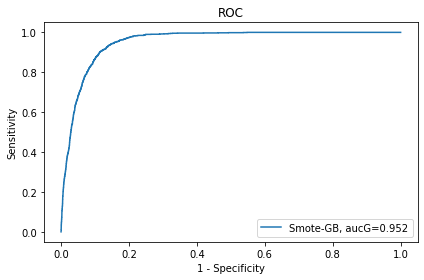

In [150]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model_G = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model_G.fit(X_train, y_train)

# make predictions for test set
y_pred = model_G.predict(X_test)
preds = [round(value) for value in y_pred]

print('*'*80)
print('XGB Without SMOTE')
print('*'*80)
print(classification_report(y_test, y_pred)) 
print('*'*80)
print(confusion_matrix(y_test, y_pred))
print('*'*80)
y_pred_proba_G = model_G.predict_proba(X_test)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test,  y_pred_proba_G)
auc_G = metrics.roc_auc_score(y_test, y_pred_proba_G)
plt.plot(fpr_G,tpr_G,label="Smote-GB, aucG="+str(np.round(auc_G,3)))
plt.legend(loc=4)
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.title('ROC')
plt.tight_layout()

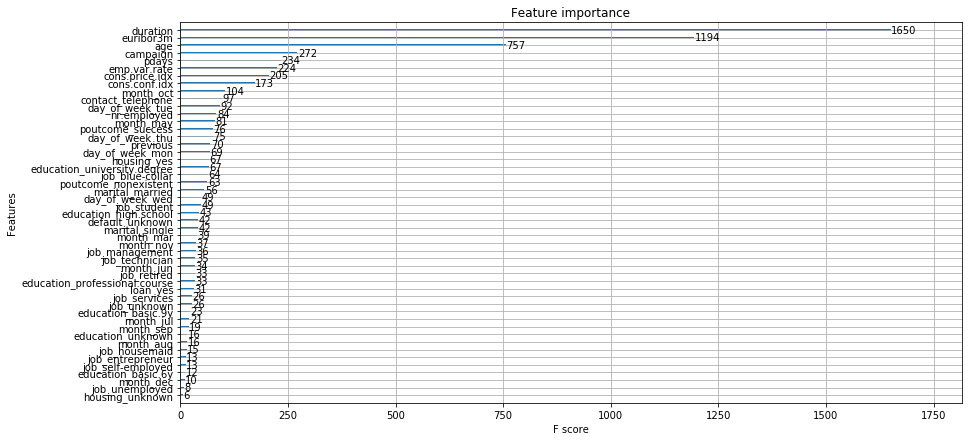

In [164]:
from xgboost import plot_importance
# plot feature importance
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(model_G)

********************************************************************************
SMOTE with XGB
********************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10969
           1       0.67      0.55      0.61      1388

    accuracy                           0.92     12357
   macro avg       0.81      0.76      0.78     12357
weighted avg       0.91      0.92      0.92     12357

********************************************************************************
[[10584   385]
 [  618   770]]
********************************************************************************


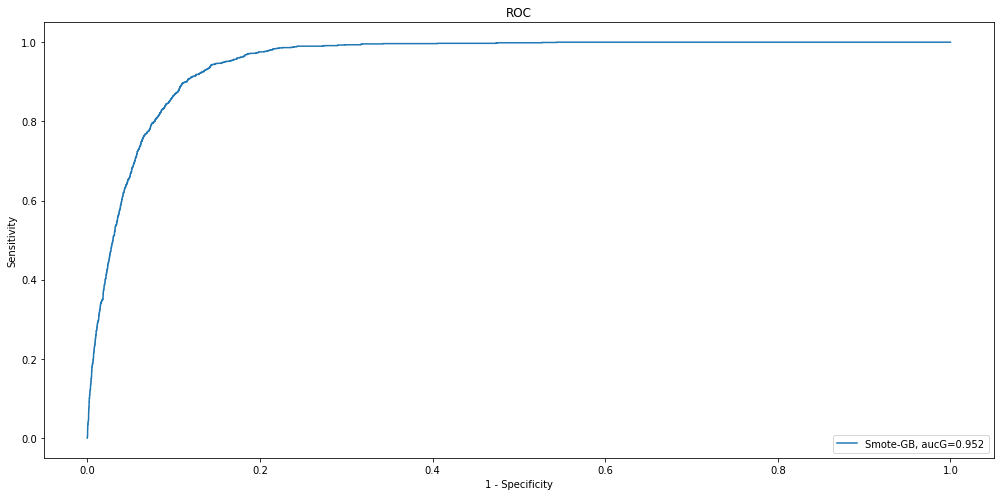

In [161]:
from sklearn.model_selection import GridSearchCV
model_Gb= XGBClassifier(max_depth = 5, n_estimators=1000, learning_rate=0.03, n_jobs=1)
grid_search = GridSearchCV(model_Gb, param_grid={}, n_jobs=1, cv = 10, scoring = "accuracy")
grid_search.fit(X_train, y_train)
cvxg_clf= grid_search.best_estimator_
y_pred = cvxg_clf.predict(X_test)
pred = [round(value) for value in y_pred]

print('*'*80)
print('SMOTE with XGB')
print('*'*80)
print(classification_report(y_test, y_pred)) 
print('*'*80)
print(confusion_matrix(y_test, y_pred))
print('*'*80)
y_pred_proba_G = cvxg_clf.predict_proba(X_test)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test,  y_pred_proba_G)
auc_G = metrics.roc_auc_score(y_test, y_pred_proba_G)
plt.plot(fpr_G,tpr_G,label="Smote-GB, aucG="+str(np.round(auc_G,3)))
plt.legend(loc=4)
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.title('ROC')
plt.tight_layout()